# Introducción a herramientas para Ciencia de Datos - Pandas

In [17]:
import datetime 
import numpy as np
import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)

results = client.get("ha6j-pa2r", limit=200)

# Convert to pandas DataFrame
datosX = pd.DataFrame.from_records(results)

datos = pd.read_json("https://www.datos.gov.co/resource/ha6j-pa2r.json")

datos.head()


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad
0,AMAZONAS,LETICIA (CT),91001000,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
1,ANTIOQUIA,PUERTO BERRÍO,5579000,SIN EMPLEO DE ARMAS,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
2,ANTIOQUIA,TURBO,5837000,NO REPORTADO,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
3,ARAUCA,ARAUCA (CT),81001000,SIN EMPLEO DE ARMAS,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
4,BOLÍVAR,CARTAGENA (CT),13001000,SIN EMPLEO DE ARMAS,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1


In [18]:
datos.shape


(1000, 9)

In [19]:
datos.dtypes

departamento     object
municipio        object
codigo_dane       int64
armas_medios     object
fecha_hecho      object
genero           object
grupo_etario     object
tipo_de_hurto    object
cantidad          int64
dtype: object

In [20]:
#¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?
datos1 = datos[['departamento','cantidad']]
datos1 = (datos1.groupby(['departamento'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())
datos1
#Podemos ver que los departamentos con mas Homicidios en la historia de estos datos son 
# 1)VALLE           209
# 2)ANTIOQUIA	    157    
# 3)CUNDINAMARCA    105
#etrte

,departamento,cantidad
0,CUNDINAMARCA,304
1,VALLE,121
2,META,72
3,SANTANDER,67
4,ANTIOQUIA,38
5,HUILA,33
6,BOLÍVAR,28
7,BOYACÁ,27
8,CESAR,24
9,RISARALDA,24


     departamento fecha_hecho  cantidad
0    CUNDINAMARCA   6/01/2010        28
1    CUNDINAMARCA  14/01/2010        25
2    CUNDINAMARCA   4/01/2010        24
3    CUNDINAMARCA  12/01/2010        23
4    CUNDINAMARCA   8/01/2010        22
..            ...         ...       ...
308       GUAJIRA   5/01/2010         1
309       GUAJIRA   7/01/2010         1
310      AMAZONAS   2/01/2010         1
311         HUILA  14/01/2010         1
312       VICHADA   5/01/2010         1

[313 rows x 3 columns]


<AxesSubplot:>

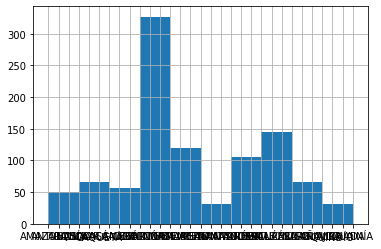

In [29]:
#1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en el último año?
datos1 = datos[['departamento','cantidad','fecha_hecho']]

datos2 = (datos1.groupby(['departamento','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

print (datos2)
datos['departamento'].hist()

#Podemos ver que los departamentos con mas Hurto 3 en el último año de estos datos son:
# 1)CUNDINAMARCA    56
# 2)CUNDINAMARCA	34    
# 3)ANTIOQUIA       12

In [30]:
#2.¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?
armas_medios_emp_num =  datos.groupby('armas_medios')['armas_medios'].count().sort_values(ascending=False)
print(armas_medios_emp_num)
# El arma mas común para cometer Hurto 3 SIN EMPLEO DE ARMAS.

armas_medios
SIN EMPLEO DE ARMAS            379
CONTUNDENTES                   334
ARMA DE FUEGO                  123
NO REPORTADO                    98
CORTANTES                       43
ARMA BLANCA / CORTOPUNZANTE     23
Name: armas_medios, dtype: int64


       genero grupo_etario  cantidad
0   MASCULINO      ADULTOS       577
1    FEMENINO      ADULTOS       421
2           -    NO APORTA        11
3    FEMENINO  ADOLECENTES         2
4  NO REPORTA      ADULTOS         1


<AxesSubplot:>

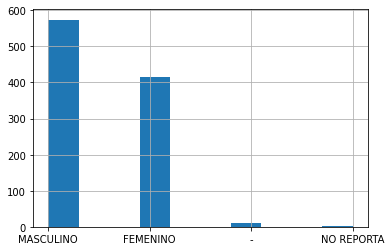

In [32]:
#3. ¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?
datos3 = (datos.groupby(['genero','grupo_etario'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index()
               )
               

datos3 =datos3.drop(['codigo_dane'],axis=1)
print(datos3)
datos['genero'].hist()


#La proporcion de hurto 3 que La  mayoria de hurtos 3 cometidos fueron realizados por 
#hombres adultos con 577 hurtos seguidos de mujeres adultas  con 421.


[]

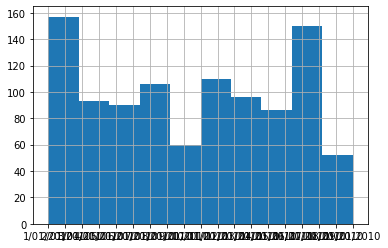

In [ ]:
#4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?
datos6 = (datos.groupby(['descripci_n_conducta','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos6 =datos6.drop(['codigo_dane'],axis=1)
datos6['fecha_hecho'].value_counts().plot()
datos6
#En los primeros dias del año, es decir en festividades de años nuevo se evidencia un alto incremento en los homicidios siendo el dia más frecute el 1 de enero.

               tipo_de_hurto  cantidad
0          HURTO RESIDENCIAS       923
1             HURTO ABIGEATO        67
2  HURTO PIRATERÍA TERRESTRE        22


<AxesSubplot:>

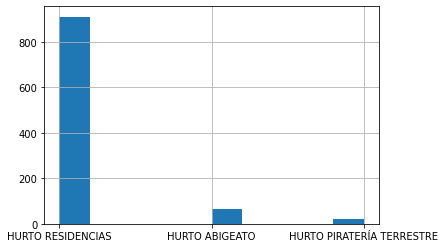

In [38]:
#4. ¿cuáles son los delitos, descripciones o modalidades más comunes?
datos7 = (datos.groupby(['tipo_de_hurto'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos7 =datos7.drop(['codigo_dane'],axis=1)
print(datos7)

datos['tipo_de_hurto'].hist()

#el tipo de hurto más comun es el hurto de residencias con 923 hurtos